<a href="https://colab.research.google.com/github/Christopher-jason/Text-Analysis/blob/main/Lab_2_Text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import scipy as sp
from scipy.stats import norm
from matplotlib import pylab
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
cd gdrive/MyDrive


/content/gdrive/MyDrive


In [ ]:
ls


'12th Marks.pdf'
 16408675193415569998395090803104.jpg
 16408675722113778110860321083783.jpg
 2017.odt
'2018 (1).gdoc'
'2018 (2).gdoc'
 2018.gdoc
 2018.odt
'ACFrOgBswoP2AkfT_2dX_IdJMZtRtKt3uoMPEQ47iqzU38sJi8XfrzbSvSXsPAKPDDGddG69sixV2NLZbzN04aR8JqesM4IFJV74rNX56ds3HQapEMFSoyymwOGYIF8=.pdf'
'ACFrOgDBELAum1loIV6vaEo5kfMIbBU5sK_sVQCzmAAwSoh80c-529C8iWHWSdE1X5OtyO8HFVLmnwPCDRjz_SGWLJquajDQKR2M__XITtY7uwIDIUKtQ4Bd8AsAunI=.pdf'
'ACFrOgDBELAum1loIV6vaEo5kfMIbBU5sK_sVQCzmAAwSoh80c-529C8iWHWSdE1X5OtyO8HFVLmnwPCDRjz_SGWLJquajDQKR2M__XITtY7uwIDIUKtQ4Bd8AsAunI=.pdf.gdoc'
 AI.pdf
'AI rough draft.gdoc'
'APL work'/
'Ardrey Kell'/
'Ashoka Essay Draft.gdoc'
'ASHOKA SOP.docx'
'ASHOKA SOP.docx.gdoc'
'ASHOKA SOP.gdoc'
'Asoka Essay Final.gdoc'
 Attachments_20151124.zip
 Backup/
 blockchain.pdf
'Bubblesort code.gdoc'
 bugreport-Nord_IND-QKQ1.200412.002-2020-11-07-17-10-55.png
 bugreport-Nord_IND-QKQ1.200412.002-2020-11-07-17-10-55.zip
'Canada 2023'/
'Change of Address.gdoc'
 Chris_Invoice_09.pdf
 Chris_Invo

In [ ]:
cd Colab\ Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
from utils import CHART_DIR

In [ ]:
def plot_clustering(x, y, title, mx=None, ymax=None, xmin=None, km=None):
    pylab.figure(num=None, figsize=(8, 6))
    if km:
        pylab.scatter(x, y, s=50, c=km.predict(list(zip(x, y))))
    else:
        pylab.scatter(x, y, s=50)

    pylab.title(title)
    pylab.xlabel("Occurrence word 1")
    pylab.ylabel("Occurrence word 2")

    pylab.autoscale(tight=True)
    pylab.ylim(ymin=0, ymax=1)
    pylab.xlim(xmin=0, xmax=1)
    pylab.grid(True, linestyle='-', color='0.75')

    return pylab

<ipython-input-24-9df51f0b4ba4>:10: DeprecationWarning: scipy.append is deprecated and will be removed in SciPy 2.0.0, use numpy.append instead
  x = sp.append(sp.append(xw1, xw2), xw3)
<ipython-input-24-9df51f0b4ba4>:11: DeprecationWarning: scipy.append is deprecated and will be removed in SciPy 2.0.0, use numpy.append instead
  y = sp.append(sp.append(yw1, yw2), yw3)


<module 'matplotlib.pylab' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pylab.py'>

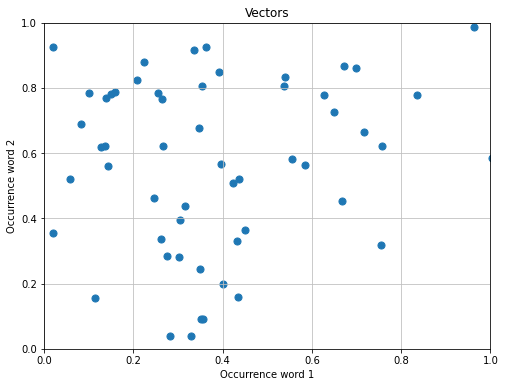

In [ ]:
xw1 = norm(loc=0.3, scale=.15).rvs(20)
yw1 = norm(loc=0.3, scale=.15).rvs(20)

xw2 = norm(loc=0.7, scale=.15).rvs(20)
yw2 = norm(loc=0.7, scale=.15).rvs(20)

xw3 = norm(loc=0.2, scale=.15).rvs(20)
yw3 = norm(loc=0.8, scale=.15).rvs(20)

x = sp.append(sp.append(xw1, xw2), xw3)
y = sp.append(sp.append(yw1, yw2), yw3)

i = 1
plot_clustering(x, y, "Vectors")


In [ ]:
seed = 2
sp.random.seed(seed)  # to reproduce the data later on

num_clusters = 3


<ipython-input-30-dcbdbc6abe0b>:5: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))
<ipython-input-30-dcbdbc6abe0b>:5: DeprecationWarning: scipy.meshgrid is deprecated and will be removed in SciPy 2.0.0, use numpy.meshgrid instead
  mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))
<ipython-input-30-dcbdbc6abe0b>:10: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  km.fit(sp.array(list(zip(x, y))))


Initialization complete
Iteration 0, inertia 2.95160134965463


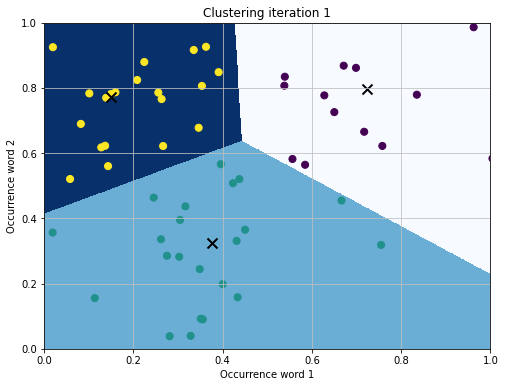

In [ ]:
 i+= 1

# 1 iteration ####################

mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))

km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=1,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 1", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c1a, c1b, c1c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
pylab.savefig(os.path.join(CHART_DIR, "1400_03_0%i.png" % i))
pylab.show()
pylab.clf()
pylab.close()

<ipython-input-31-765ed516e6fd>:7: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  km.fit(sp.array(list(zip(x, y))))


Initialization complete
Iteration 0, inertia 2.95160134965463
Iteration 1, inertia 2.6677556350713227


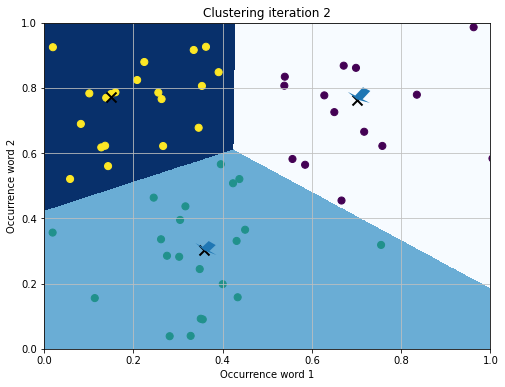

In [ ]:
i += 1

# 2 iterations ####################
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=2,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 2", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c2a, c2b, c2c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

pylab.gca().add_patch(
    pylab.Arrow(c1a[0], c1a[1], c2a[0] - c1a[0], c2a[1] - c1a[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1b[0], c1b[1], c2b[0] - c1b[0], c2b[1] - c1b[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1c[0], c1c[1], c2c[0] - c1c[0], c2c[1] - c1c[1], width=0.1))

pylab.savefig(os.path.join(CHART_DIR, "1400_03_0%i.png" % i))
pylab.show()
pylab.clf()
pylab.close()

In [ ]:
import sklearn.datasets
import scipy as sp

In [ ]:
new_post = \
    """Disk drive problems. Hi, I have a problem with my hard disk.
After 1 year it is working only sporadically now.
I tried to format it, but now it doesn't boot any more.
Any ideas? Thanks.
"""

all_data = sklearn.datasets.fetch_20newsgroups(subset="all")
print("Number of total posts: %i" % len(all_data.filenames))
# Number of total posts: 18846

groups = [
    'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware', 'comp.windows.x', 'sci.space']
train_data = sklearn.datasets.fetch_20newsgroups(subset="train",
                                                 categories=groups)
print("Number of training posts in tech groups:", len(train_data.filenames))
# Number of training posts in tech groups: 3529

Number of total posts: 18846
Number of training posts in tech groups: 3529


In [ ]:
labels = train_data.target
num_clusters = 50

In [ ]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
class StemmedTfidfVectorizer(TfidfVectorizer):

    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                    stop_words='english', decode_error='ignore'
                                    )

vectorized = vectorizer.fit_transform(train_data.data)
num_samples, num_features = vectorized.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

#samples: 3529, #features: 4712


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_clusters, n_init=1, verbose=1, random_state=3)
clustered = km.fit(vectorized)

print("km.labels_=%s" % km.labels_)
# km.labels_=[ 6 34 22 ...,  2 21 26]

print("km.labels_.shape=%s" % km.labels_.shape)

Initialization complete
Iteration 0, inertia 5686.0525436637
Iteration 1, inertia 3164.8875140123528
Iteration 2, inertia 3132.2077111951467
Iteration 3, inertia 3111.712575878138
Iteration 4, inertia 3098.583773647865
Iteration 5, inertia 3092.1905280374385
Iteration 6, inertia 3087.2770892443127
Iteration 7, inertia 3084.1004773772715
Iteration 8, inertia 3082.7997677507046
Iteration 9, inertia 3082.234382617422
Iteration 10, inertia 3081.9487984162006
Iteration 11, inertia 3081.843333964575
Iteration 12, inertia 3081.790665037127
Iteration 13, inertia 3081.752217763826
Iteration 14, inertia 3081.659718679884
Iteration 15, inertia 3081.616791469508
Iteration 16, inertia 3081.5894842981634
Iteration 17, inertia 3081.57097030357
Converged at iteration 17: strict convergence.
km.labels_=[48 23 31 ...  6  2 22]
km.labels_.shape=3529


In [ ]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
# Homogeneity: 0.400
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
# Completeness: 0.206
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
# V-measure: 0.272
print("Adjusted Rand Index: %0.3f" %
      metrics.adjusted_rand_score(labels, km.labels_))
# Adjusted Rand Index: 0.064
print("Adjusted Mutual Information: %0.3f" %
      metrics.adjusted_mutual_info_score(labels, km.labels_))
# Adjusted Mutual Information: 0.197
print(("Silhouette Coefficient: %0.3f" %
       metrics.silhouette_score(vectorized, labels, sample_size=1000)))

Homogeneity: 0.445
Completeness: 0.231
V-measure: 0.304
Adjusted Rand Index: 0.094
Adjusted Mutual Information: 0.294
Silhouette Coefficient: 0.006


In [ ]:
new_post_vec = vectorizer.transform([new_post])
new_post_label = km.predict(new_post_vec)[0]

In [ ]:
similar_indices = (km.labels_ == new_post_label).nonzero()[0]

In [ ]:
similar = []
for i in similar_indices:
    dist = sp.linalg.norm((new_post_vec - vectorized[i]).toarray())
    similar.append((dist, train_data.data[i]))

In [ ]:
similar = sorted(similar)
print("Count similar: %i" % len(similar))

Count similar: 56


In [ ]:
show_at_1 = similar[0]
show_at_2 = similar[int(len(similar) / 10)]
show_at_3 = similar[int(len(similar) / 2)]

In [ ]:
print("=== #1 ===")
print(show_at_1)
print()

=== #1 ===
(1.0378441731334074, "From: Thomas Dachsel <GERTHD@mvs.sas.com>\nSubject: BOOT PROBLEM with IDE controller\nNntp-Posting-Host: sdcmvs.mvs.sas.com\nOrganization: SAS Institute Inc.\nLines: 25\n\nHi,\nI've got a Multi I/O card (IDE controller + serial/parallel\ninterface) and two floppy drives (5 1/4, 3 1/2) and a\nQuantum ProDrive 80AT connected to it.\nI was able to format the hard disk, but I could not boot from\nit. I can boot from drive A: (which disk drive does not matter)\nbut if I remove the disk from drive A and press the reset switch,\nthe LED of drive A: continues to glow, and the hard disk is\nnot accessed at all.\nI guess this must be a problem of either the Multi I/o card\nor floppy disk drive settings (jumper configuration?)\nDoes someone have any hint what could be the reason for it.\nPlease reply by email to GERTHD@MVS.SAS.COM\nThanks,\nThomas\n+-------------------------------------------------------------------+\n| Thomas Dachsel                              

In [ ]:
print("=== #2 ===")
print(show_at_2)
print()

=== #2 ===
(1.1503043264096682, 'From: rpao@mts.mivj.ca.us (Roger C. Pao)\nSubject: Re: Booting from B drive\nOrganization: MicroTech Software\nLines: 34\n\nglang@slee01.srl.ford.com (Gordon Lang) writes:\n\n>David Weisberger (djweisbe@unix.amherst.edu) wrote:\n>: I have a 5 1/4" drive as drive A.  How can I make the system boot from\n>: my 3 1/2" B drive?  (Optimally, the computer would be able to boot\n>: from either A or B, checking them in order for a bootable disk.  But\n>: if I have to switch cables around and simply switch the drives so that\n>: it can\'t boot 5 1/4" disks, that\'s OK.  Also, boot_b won\'t do the trick\n>: for me.)\n>: \n>: Thanks,\n>:   Davebo\n>We had the same issue plague us for months on our Gateway.  I finally\n>got tired of it so I permanently interchanged the drives.  The only\n>reason I didn\'t do it in the first place was because I had several\n>bootable 5-1/4\'s and some 5-1/4 based install disks which expected\n>the A drive.  I order all new software 